# Check Normal Distribution

## setup

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from numpy.random import randn
from scipy.stats import shapiro

In [9]:
NUM_KIDS = 100 # per story

HN_STORIES_JSON = '../hn_stories_dataset_final.json' # raw stories data, used to fetch comments from kid ids
HN_COMMENTS_JSON = '../hn_comments_dataset_final.json' # store raw stories + comments
HN_COMMENTS_CSV = 'sentiment_385_sampled.csv' # converted from json to csv
HN_COMMENTS_SAMPLED_CSV = 'sentiment_385_sampled.csv' # uniformly sampled comments for ground truth
HN_COMMENTS_SAMPLED_CLEANUP_CSV = 'sentiment_385_sampled_cleanup.csv' # after removing notes columns

# Define the base URL for the Hacker News API
BASE_URL = 'https://hacker-news.firebaseio.com/v0'

DEPTH = 1 # comments depth

# cleanup csv

In [10]:
import csv


# Columns to remove
columns_to_remove = ['thai_note', 'grace_note', 'explanation', 'neg', 'neutral', 'pos']

# Read the input CSV and write to the output CSV
with open(HN_COMMENTS_SAMPLED_CSV, 'r', newline='', encoding='utf-8') as infile, \
     open(HN_COMMENTS_SAMPLED_CLEANUP_CSV, 'w', newline='', encoding='utf-8') as outfile:

    reader = csv.DictReader(infile)

    # Get fieldnames and remove unwanted columns
    fieldnames = [field for field in reader.fieldnames if field not in columns_to_remove]

    writer = csv.DictWriter(outfile, fieldnames=fieldnames)
    writer.writeheader()

    for row in reader:
        # Remove unwanted columns from each row
        for column in columns_to_remove:
            row.pop(column, None)
        writer.writerow(row)

print(f"CSV file has been cleaned and saved as {HN_COMMENTS_SAMPLED_CLEANUP_CSV}")

CSV file has been cleaned and saved as sentiment_385_sampled_cleanup.csv


# Distribution of each sentiment probability

In [12]:
data = pd.read_csv(HN_COMMENTS_SAMPLED_CLEANUP_CSV)

data.head(5)

,discussion_id,title,url,discussion_date,comment_id,parent_id,depth,comment_text,comment_date,comment_author,thai_label,grace_label,agreement,consensus_agreement
0,31533180,Codeball – AI-powered code review,https://codeball.ai/,2022-05-28 1:38,31534424,NaN,0,Explanation of results for non-ML folks (resul...,2022-05-28 3:19,apugoneappu,0,0,True,0
1,31555920,Show HN: Easily create How-to videos with AI,https://www.wowto.ai/,2022-05-30 13:12,31557237,NaN,0,This sounds like it would absolutely ruin the ...,2022-05-30 16:54,alexb_,-1,-1,True,-1
2,31662560,Addressing AI’s energy cost,https://numenta.com/blog/2022/05/24/ai-is-harm...,2022-06-08 9:34,31662863,NaN,0,Limiting energy use while continuing to use ca...,2022-06-08 10:29,qgin,-1,-1,True,-1
3,31776740,Minimum Viable Architecture in Practice: Creat...,https://www.infoq.com/articles/minimum-viable-...,2022-06-17 18:43,31778278,NaN,0,"On a related note, thank god these chatbots ha...",2022-06-17 21:00,ramesh31,-1,0,False,1
4,31934400,Build your own GitHub Copilot with Salesforce ...,https://www.youtube.com/watch?v=8VyGlSKsYeo,2022-06-30 22:58,31940283,NaN,0,As someone who has worked at Salesforce (and i...,2022-07-01 6:53,ubertaco,-1,-1,True,-1


Negative

In [14]:
negative = data['consensus_agreement']
shapiro(negative)

ShapiroResult(statistic=0.7768034982322651, pvalue=1.502532294716119e-22)

<function matplotlib.pyplot.show(close=None, block=None)>

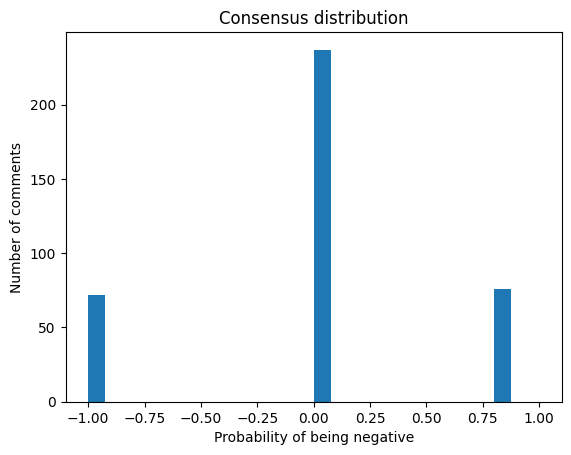

In [19]:
plt.hist(x=data['consensus_agreement'],width = 0.075)
plt.title("Consensus distribution")
plt.xlabel("Probability of being negative")
plt.ylabel("Number of comments")
plt.show

Neutral

In [17]:
neutral = data['grace_label']
shapiro(neutral)

ShapiroResult(statistic=0.7976879188161983, pvalue=1.4401106786119219e-21)

In [18]:
neutral = data['thai_label']
shapiro(neutral)

ShapiroResult(statistic=0.7446450283370905, pvalue=6.222127748902761e-24)

<function matplotlib.pyplot.show(close=None, block=None)>

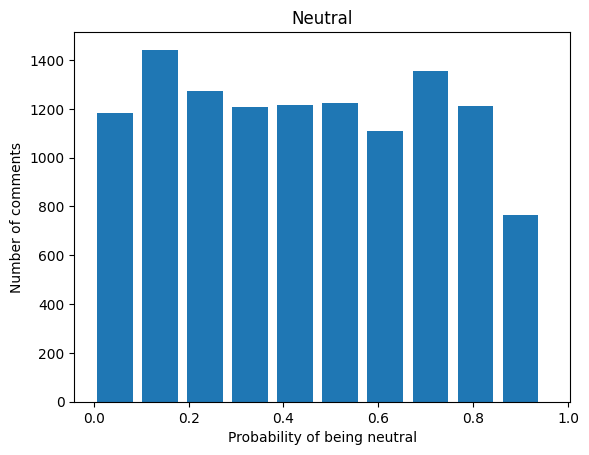

In [14]:
plt.hist(x=data.neutral,width = 0.075)
plt.title("Neutral")
plt.xlabel("Probability of being neutral")
plt.ylabel("Number of comments")
plt.show

Positive

In [6]:
positive = data.positive
shapiro(positive)

ShapiroResult(statistic=np.float64(nan), pvalue=np.float64(nan))

<function matplotlib.pyplot.show(close=None, block=None)>

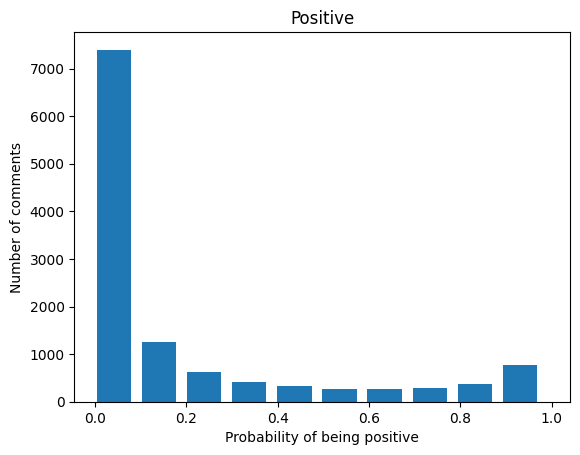

In [13]:
plt.hist(x=data.positive,width = 0.075)
plt.title("Positive")
plt.xlabel("Probability of being positive")
plt.ylabel("Number of comments")
plt.show